## 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

## 데이터 불러오기

In [2]:
# 데이터 불러오기
abtest_df = pd.read_csv('./data/cookie_cats.txt')
abtest_df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


- userid : 사용자 ID
- version : gate 위치에 따른 플레이어 실험 그룹(A/B 테스트 그룹)
- sum_gamerounds : 설치 후 14일 동안 플레이한 총 게임 라운드 수
- retention_1 : 설치 1일 후에도 다시 게임을 플레이했는지 여부 (True/False)
- retention_7 : 설치 7일 후에도 다시 게임을 플레이했는지 여부 (True/False)

In [3]:
# 데이터 정보 확인
abtest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


결측값 없음

In [4]:
# 데이터 기초 통계량 확인
abtest_df.describe(include='all')

,userid,version,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189,90189.000000,90189,90189
unique,NaN,2,NaN,2,2
top,NaN,gate_40,NaN,False,False
freq,NaN,45489,NaN,50036,73408
mean,4.998412e+06,NaN,51.872457,NaN,NaN
std,2.883286e+06,NaN,195.050858,NaN,NaN
min,1.160000e+02,NaN,0.000000,NaN,NaN
25%,2.512230e+06,NaN,5.000000,NaN,NaN
50%,4.995815e+06,NaN,16.000000,NaN,NaN
75%,7.496452e+06,NaN,51.000000,NaN,NaN


In [5]:
# Gate 30과 Gate 40의 분배 확인
abtest_df['version'].value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

## 데이터 전처리

### 중복값 확인

In [6]:
# 중복값 확인
duplicate_rows = abtest_df.duplicated().sum()
print(f"중복된 행 개수 : {duplicate_rows}")

# 중복값이 있는 경우 제거
if duplicate_rows > 0:
    abtest_df = abtest_df.drop_duplicates()
    print("중복된 행 제거 완료")

# 중복값 제거 후 데이터 크기 비교
print(f"중복 제거 후 데이터 크기 : {abtest_df.shape[0]}행")

중복된 행 개수 : 0
중복 제거 후 데이터 크기 : 90189행


### 이상치 확인

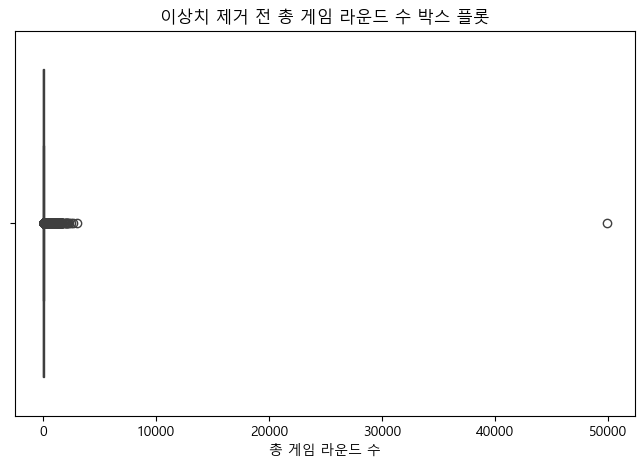

In [7]:
# 이상치 시각화 (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x=abtest_df["sum_gamerounds"])
plt.title("이상치 제거 전 총 게임 라운드 수 박스 플롯")
plt.xlabel("총 게임 라운드 수")
plt.show()

In [8]:
# 1개의 이상치 확인
max_value = abtest_df["sum_gamerounds"].max()
print(f"발견된 이상치 값 : {max_value} 회")

# 이상치 제거
abtest_df = abtest_df[abtest_df["sum_gamerounds"] != max_value]

발견된 이상치 값 : 49854 회


- 대부분의 데이터는 총 게임 라운드 수가 3,000 회를 넘지 않음
- 반면, 한 개의 데이터에서 49,854 회라는 비정상적으로 큰 값이 확인됨
- 일반적인 플레이 패턴과 크게 벗어나므로 이상치로 판단하여 제거함

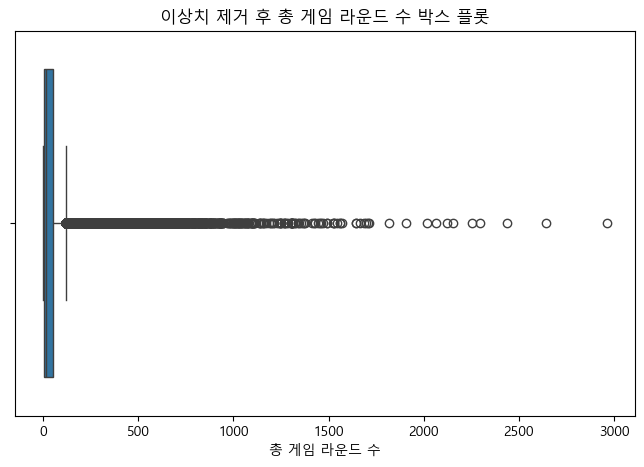

In [9]:
# 이상치 제거 후 Box Plot 다시 그리기
plt.figure(figsize=(8, 5))
sns.boxplot(x=abtest_df["sum_gamerounds"])
plt.title("이상치 제거 후 총 게임 라운드 수 박스 플롯")
plt.xlabel("총 게임 라운드 수")
plt.show()

### 총 게임 라운드 수에 따른 유저 수

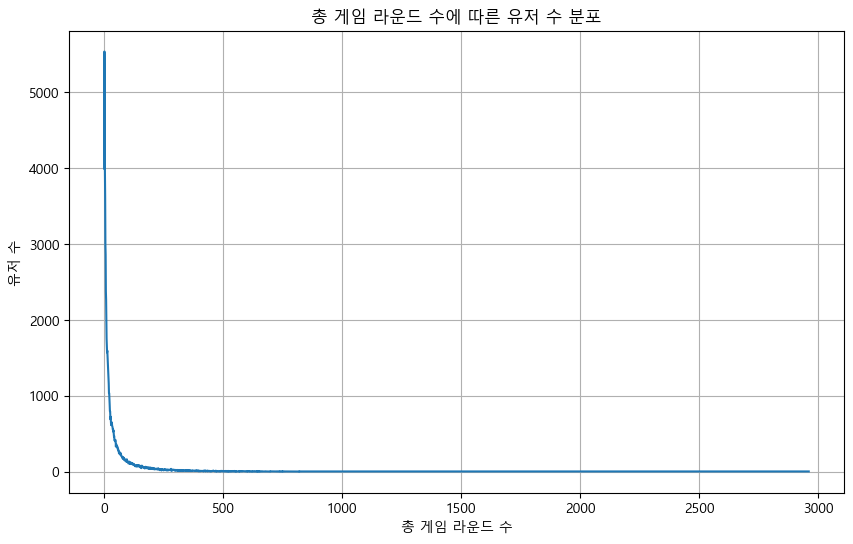

In [10]:
# 총 게임 라운드 수에 따른 유저 수 계산 (더 촘촘한 bin 설정)
bins = np.arange(0, abtest_df['sum_gamerounds'].max() + 1, 1)
counts, bin_edges = np.histogram(abtest_df['sum_gamerounds'], bins=bins)

# 각 구간의 중앙값을 x축 값으로 사용
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, counts)

# 그래프 설정
plt.title("총 게임 라운드 수에 따른 유저 수 분포")
plt.xlabel("총 게임 라운드 수")
plt.ylabel("유저 수")
plt.grid(True)

# 그래프 출력
plt.show()

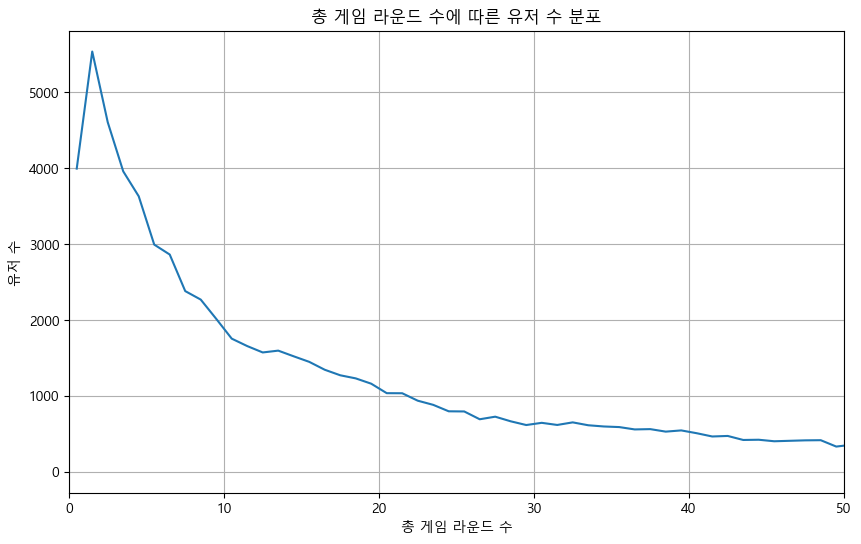

In [11]:
# 총 게임 라운드 수에 따른 유저 수 계산(0~50)
bins = np.arange(0, abtest_df['sum_gamerounds'].max() + 1, 1)
counts, bin_edges = np.histogram(abtest_df['sum_gamerounds'], bins=bins)

# 각 구간의 중앙값을 x축 값으로 사용
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, counts)

# X축 범위 제한
plt.xlim(0, 50)

# 그래프 설정
plt.title("총 게임 라운드 수에 따른 유저 수 분포")
plt.xlabel("총 게임 라운드 수")
plt.ylabel("유저 수")
plt.grid(True)

# 그래프 출력
plt.show()

In [12]:
# 총 게임 라운드 수가 0인 유저 수 계산
zero_round_users = len(abtest_df[abtest_df['sum_gamerounds'] == 0])

# 결과 출력
print(f"총 게임 라운드 수가 0회인 유저 수 : {zero_round_users}명")

총 게임 라운드 수가 0회인 유저 수 : 3994명


- 총 게임 라운드 수가 0회인 유저도 다수 존재함
- 이는 게임을 설치하고 한 번도 플레이하지 않은 유저를 의미함
- 데이터 확인 결과, 총 3,994명의 유저가 해당됨

본 데이터는 A/B 테스트 결과 분석을 위한 것이므로 게임 설치 후 한 번도 플레이하지 않은 유저에 대한 분석은 다른 데이터로 진행하도록 함

#### **선택지 분석**
- `sum_gamerounds ≥ 30` : Gate 30의 유저 이탈률을 비교적 정확하게 볼 수 있지만, Gate 40 그룹에서는 일부 유저가 Gate를 경험하지 않았을 가능성이 있음.
- `sum_gamerounds ≥ 40` : 모든 유저가 Gate를 경험했을 가능성이 높지만, Gate 30 그룹의 초반 이탈 유저가 제외되어 비교가 왜곡될 수 있음.
- `sum_gamerounds = level`이 아니므로, 두 선택지 모두 반복적으로 실패한 유저는 여전히 Gate를 만나지 못했을 가능성이 있음.

→ `sum_gamerounds ≥ 40`을 사용하면 대부분의 유저가 Gate를 경험한 후 이탈률을 비교할 수 있어 A/B 테스트의 공정성이 높아짐

In [13]:
# 두 그룹을 동일한 기준으로 필터링
abtest_df_filtered = abtest_df[abtest_df['sum_gamerounds'] >= 40]
print(f"필터링 후 데이터 크기 : {len(abtest_df_filtered)}")

필터링 후 데이터 크기 : 27392


전처리 전 90,189행 → 전처리 후 27,392행 (약 2.76배 감소)

In [14]:
# 데이터프레임 복사
abtest_df = abtest_df_filtered.reset_index(drop=True).copy()

- 레벨 30 Gate와 레벨 40 Gate의 효과를 검증해야 하는데 많은 유저의 총 게임 라운드 수가 30회 미만임
- A/B 테스트 결과의 정확성을 높이기 위해 **총 게임 라운드 수가 40 미만인 유저를 제외**함
- version별로 서로 다른 기준을 적용하지 않은 이유는 A/B 테스트에서 두 그룹을 동일한 조건에서 비교하는 것이 더 공정하기 때문

In [15]:
# Gate 30과 Gate 40의 분배 확인
abtest_df['version'].value_counts()

version
gate_40    13827
gate_30    13565
Name: count, dtype: int64

버전별 분포는 유사해 보이지만 통계적 검정을 통해 추가로 확인함

In [16]:
import scipy.stats as stats

# 두 그룹의 샘플 크기
gate_30_size = abtest_df['version'].value_counts()['gate_30']
gate_40_size = abtest_df['version'].value_counts()['gate_40']

# 카이제곱 검정으로 샘플 크기 차이가 유의미한지 확인
chi2, p_value = stats.chisquare([gate_30_size, gate_40_size])

# 결과 출력
print(f"Chi-square test statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# 유의미한 차이 여부 확인
if p_value < 0.05:
    print("샘플 크기 차이가 통계적으로 유의미함")
else:
    print("샘플 크기 차이가 통계적으로 유의미하지 않음")

Chi-square test statistic: 2.5060
P-value: 0.1134
샘플 크기 차이가 통계적으로 유의미하지 않음


샘플 크기 차이가 통계적으로 유의미하지 않으므로 데이터를 그대로 사용하기로 결정함

## 가설 설정 및 검증

In [17]:
# 1일차 리텐션과 7일차 리텐션의 교차표 생성
abtest_df.groupby(['retention_1', 'retention_7']).size().unstack()

retention_7,False,True
retention_1,,
False,2613,1937
True,11251,11591


### 가설 1 : Gate 위치 변경이 유저의 평균 게임 라운드 수에 유의미한 영향을 미칠 것이다

독립표본 t-검정(T-test) 수행
- 귀무가설(H₀): Gate 30 그룹과 Gate 40 그룹의 평균 게임 플레이 횟수는 차이가 없다.
- 대립가설(H₁): Gate 30 그룹과 Gate 40 그룹의 평균 게임 플레이 횟수는 차이가 있다.

In [18]:
# 그룹별 평균 게임 플레이 횟수 계산
gamerounds_means = abtest_df.groupby("version")[['sum_gamerounds']].mean()

# 결과 출력
print(gamerounds_means)

         sum_gamerounds
version                
gate_30      142.048802
gate_40      142.667824


In [19]:
from scipy.stats import ttest_ind

# Control(gate_30)과 Treatment(gate_40) 그룹의 평균 게임 라운드 수
control_time = abtest_df[abtest_df['version'] == 'gate_30']['sum_gamerounds']
treatment_time = abtest_df[abtest_df['version'] == 'gate_40']['sum_gamerounds']

# 독립표본 t-검정 수행
t_stat, p_value = ttest_ind(control_time, treatment_time, equal_var=False)

# 결과 출력
print("[독립표본 t-검정 결과]")
print(f"t-통계량: {t_stat:.4f}")
print(f"p-값: {p_value:.4f}")

# 유의수준 0.05 하에서 유의미한 차이가 있는지 판단
if p_value < 0.05:
    print("두 그룹 간 평균 게임 라운드 수에 유의미한 차이가 있음(O)")
else:
    print("두 그룹 간 평균 게임 라운드 수에 유의미한 차이가 없음(X)")

[독립표본 t-검정 결과]
t-통계량: -0.3411
p-값: 0.7330
두 그룹 간 평균 게임 라운드 수에 유의미한 차이가 없음(X)


### 가설 2 : Gate의 위치가 유저의 리텐션(1일차, 7일차)에 유의미한 영향을 미칠 것이다

카이제곱 검정(Chi-Square Test) 수행(1일차, 7일차)
- 귀무가설(H₀): Gate 30과 Gate 40 그룹의 리텐션은 유의미한 차이가 없다.
- 대립가설(H₁): Gate 30과 Gate 40 그룹의 리텐션은 유의미한 차이가 있다.

In [20]:
# 그룹별 1일차 및 7일차 리텐션 평균 계산
retention_means = abtest_df.groupby("version")[["retention_1", "retention_7"]].mean()

# 결과 출력
print(retention_means)

         retention_1  retention_7
version                          
gate_30     0.837670     0.502838
gate_40     0.830187     0.485065


In [21]:
from scipy.stats import chi2_contingency

# 1일차 리텐션 데이터 교차표 생성
contingency_1 = pd.crosstab(abtest_df['version'], abtest_df['retention_1'])

# 7일차 리텐션 데이터 교차표 생성
contingency_7 = pd.crosstab(abtest_df['version'], abtest_df['retention_7'])

# 카이제곱 검정 수행
chi2_1, p_1, _, _ = chi2_contingency(contingency_1)
chi2_7, p_7, _, _ = chi2_contingency(contingency_7)

# 1일차 리텐션
print("\n[카이제곱 검정 결과 - 1일차 리텐션]")
print(f"카이제곱 통계량: {chi2_1:.4f}")
print(f"p-값: {p_1:.4f}")
if p_1 < 0.05:
    print("두 그룹 간 1일차 리텐션에 유의미한 차이가 있음(O)")
else:
    print("두 그룹 간 1일차 리텐션에 유의미한 차이가 없음(X)")

# 7일차 리텐션
print("\n[카이제곱 검정 결과 - 7일차 리텐션]")
print(f"카이제곱 통계량: {chi2_7:.4f}")
print(f"p-값: {p_7:.4f}")
if p_7 < 0.05:
    print("두 그룹 간 7일차 리텐션에 유의미한 차이가 있음(O)")
else:
    print("두 그룹 간 7일차 리텐션에 유의미한 차이가 없음(X)")


[카이제곱 검정 결과 - 1일차 리텐션]
카이제곱 통계량: 2.7144
p-값: 0.0994
두 그룹 간 1일차 리텐션에 유의미한 차이가 없음(X)

[카이제곱 검정 결과 - 7일차 리텐션]
카이제곱 통계량: 8.5819
p-값: 0.0034
두 그룹 간 7일차 리텐션에 유의미한 차이가 있음(O)


### 가설 3 : 유저 세그먼트에 따라 Gate 40이 7일차 리텐션에 미치는 영향이 다를 것이다

유저 세그먼트 방법 : 게임 라운드 수의 상위 10%는 헤비 유저, 나머지는 라이트 유저로 구분

In [22]:
heavy_threshold = abtest_df["sum_gamerounds"].quantile(0.90)  # 90% 분위수
print(f"헤비 유저 기준 라운드 수 : {heavy_threshold}")

헤비 유저 기준 라운드 수 : 297.0


In [23]:
# 헤비 유저 기준 설정 (90% 분위수)
heavy_threshold = abtest_df["sum_gamerounds"].quantile(0.90)

# 유저 세그먼트 컬럼 추가
abtest_df["user_segment"] = abtest_df["sum_gamerounds"].apply(lambda x: "Heavy Users" if x >= heavy_threshold else "Light Users")

# 결과 확인
abtest_df[["sum_gamerounds", "user_segment"]].head()

,sum_gamerounds,user_segment
0,165,Light Users
1,179,Light Users
2,187,Light Users
3,108,Light Users
4,153,Light Users


카이제곱 검정(Chi-Square Test) 수행(라이트, 헤비 유저)
- 귀무가설(H₀): Gate 40은 유저 세그먼트별 7일차 리텐션에 유의미한 영향을 미치지 않는다.
- 대립가설(H₁): Gate 40은 유저 세그먼트별 7일차 리텐션에 유의미한 영향을 미친다.

In [24]:
# 그룹별 1일차 및 7일차 리텐션 평균 계산
segment_retention_means = abtest_df.groupby(["version", "user_segment"])[["retention_1", "retention_7"]].mean()

# 결과 출력
print(segment_retention_means)

                      retention_1  retention_7
version user_segment                          
gate_30 Heavy Users      0.946260     0.901235
        Light Users      0.825402     0.457827
gate_40 Heavy Users      0.949451     0.912821
        Light Users      0.817124     0.438212


In [34]:
# 각 세그먼트에서 A/B 테스트 비교 - 1일차 리텐션
for segment in abtest_df["user_segment"].unique():
    print(f"\n[카이제곱 검정 결과 - 유저 세그먼트 {segment} 1일차 리텐션]")

    segment_data = abtest_df[abtest_df["user_segment"] == segment]
    contingency_table = pd.crosstab(segment_data["version"], segment_data["retention_1"])
    
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"카이제곱 검정 결과: p-value = {p:.4f}")
    if p < 0.05:
        print("두 그룹 간 리텐션율에 유의미한 차이가 있음(O)")
    else:
        print("두 그룹 간 리텐션율에 유의미한 차이가 없음(X)")


[카이제곱 검정 결과 - 유저 세그먼트 Light Users 1일차 리텐션]
카이제곱 검정 결과: p-value = 0.0931
두 그룹 간 리텐션율에 유의미한 차이가 없음(X)

[카이제곱 검정 결과 - 유저 세그먼트 Heavy Users 1일차 리텐션]
카이제곱 검정 결과: p-value = 0.7720
두 그룹 간 리텐션율에 유의미한 차이가 없음(X)


In [35]:
# 각 세그먼트에서 A/B 테스트 비교 - 7일차 리텐션
for segment in abtest_df["user_segment"].unique():
    print(f"\n[카이제곱 검정 결과 - 유저 세그먼트 {segment} 7일차 리텐션]")

    segment_data = abtest_df[abtest_df["user_segment"] == segment]
    contingency_table = pd.crosstab(segment_data["version"], segment_data["retention_7"])
    
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"카이제곱 검정 결과: p-value = {p:.4f}")
    if p < 0.05:
        print("두 그룹 간 리텐션율에 유의미한 차이가 있음(O)")
    else:
        print("두 그룹 간 리텐션율에 유의미한 차이가 없음(X)")


[카이제곱 검정 결과 - 유저 세그먼트 Light Users 7일차 리텐션]
카이제곱 검정 결과: p-value = 0.0020
두 그룹 간 리텐션율에 유의미한 차이가 있음(O)

[카이제곱 검정 결과 - 유저 세그먼트 Heavy Users 7일차 리텐션]
카이제곱 검정 결과: p-value = 0.3277
두 그룹 간 리텐션율에 유의미한 차이가 없음(X)


## 시각화

### 특정 사용자 그룹의 행동 패턴 분석

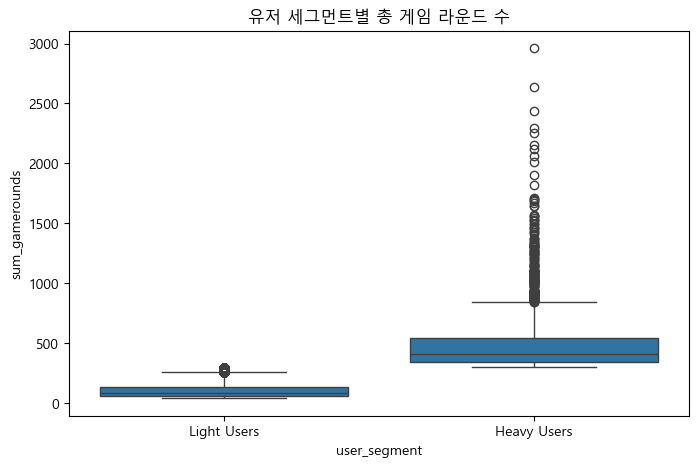

In [27]:
# 유저 세그먼트별 총 게임 라운드 수
plt.figure(figsize=(8,5))
sns.boxplot(x="user_segment", y="sum_gamerounds", data=abtest_df)
plt.title("유저 세그먼트별 총 게임 라운드 수")
plt.show()

## 인사이트 도출

#### 1. Gate 위치 변경이 유저의 평균 게임 라운드 수에 미치는 영향
- Gate 30과 Gate 40의 평균 게임 라운드 수 차이는 유의미하지 않음 (p = 0.7330)
- Gate 위치 변경이 게임 참여도를 높이는 전략으로는 효과적이지 않음

#### 2. Gate 위치 변경이 유저 리텐션(1일차, 7일차)에 미치는 영향
- 1일차 리텐션 : 유의미한 차이 없음 (p = 0.0994) → Gate 40으로 변경해도 초기 유지율 변화 없음
- 7일차 리텐션 : 유의미한 차이 있음 (p = 0.0034) → Gate 40에서 7일차 리텐션 감소 (50.28% → 48.51%)
    - Gate 40이 장기적인 유저 유지율을 낮추는 원인일 가능성이 높음

7일차 리텐션 감소는 **쾌락적 적응(Hedonic Adaptation)** 이론으로 설명 가능

- Gate가 늦게 등장하면 유저가 몰입하기 전에 흥미를 잃고 이탈할 가능성이 커짐
- 반면, Gate 30처럼 초반에 장애물이 주어지면 유저가 게임을 쉬면서 즐거움을 유지할 가능성이 높아짐

#### 3. 유저 세그먼트별 Gate 40의 7일차 리텐션 영향
- 헤비 유저 (Heavy Users) : Gate 위치 변경이 영향을 주지 않음 (p = 0.3277)
    - 헤비 유저는 Gate와 관계없이 지속적으로 플레이하는 경향이 있음
- 라이트 유저 (Light Users) : Gate 40에서 7일차 리텐션 감소 (p = 0.0020)
    - Gate 40이 초반 이탈 가능성이 높은 유저들에게 부정적인 영향을 미침
    - 라이트 유저의 장기 유지율을 고려하면 Gate 30이 더 적절한 선택일 가능성이 높음

## 결론 및 액션 제안

#### 1. Gate 40으로 변경 시 7일차 리텐션 감소 → 이탈 방지 대책 필요  
- 라이트 유저의 이탈을 줄이기 위해 보상 시스템 강화 및 게임 내 가이드 제공 필요  

#### 2. Gate 위치 변경만으로 플레이 횟수가 증가하지 않음 → 대체 전략 필요  
- 게임 플레이 횟수를 늘리려면 보상 시스템 도입 및 신규 콘텐츠 추가가 필요  

#### 3. 헤비 유저는 Gate 위치와 관계없이 지속적으로 플레이 → 유료 전환율 분석 필요  
- 프리미엄 콘텐츠 도입 및 Gate를 활용한 유료 아이템 구매 유도 전략 검토

#### 4. 추가적인 A/B 테스트 및 데이터 분석을 통해 최적의 Gate 위치 검토 필요  
- Gate를 Level 20에 배치하는 실험 진행 및 Gate가 유저 결제 비율 및 장기적인 매출에 미치는 영향 분석  

결론적으로, Gate 30을 유지하는 것이 리텐션을 높이는 데 효과적이며, 추가적인 실험을 통해 최적의 Gate 위치 및 유료 전환율 전략을 검토해야 함
